In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Wage Data

## 기초통계 + 탐색적 자료분석

In [4]:
wage = pd.read_csv("./data_2/Wage.csv")

In [6]:
wage.head()
# : 조사한 연도, 근로자의 나이, 결혼 여부, 인종, 교육 수준, 지역, 직업 소분류 (산업 / 정보), 건강 상태, 보험 유무
# : log(wage), wage

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [12]:
wage.isnull().any()

year          False
age           False
maritl        False
race          False
education     False
region        False
jobclass      False
health        False
health_ins    False
logwage       False
wage          False
dtype: bool

In [16]:
wage.isna().any()

year          False
age           False
maritl        False
race          False
education     False
region        False
jobclass      False
health        False
health_ins    False
logwage       False
wage          False
dtype: bool

In [17]:
wage.isna().sum()

year          0
age           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [18]:
wage.isnull().sum()

year          0
age           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

결측치는 없었다

In [19]:
wage.shape

(3000, 11)

In [22]:
wage.describe() # 연속형 자료에 대한 요약통계량

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


Text(0.5,1,'wage')

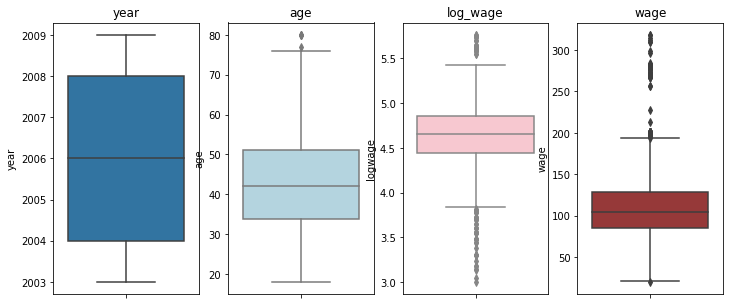

In [63]:
fig = plt.figure(figsize = (12,5))

plt.subplot(141)
sns.boxplot(y = "year", data = wage)
plt.title("year")
plt.subplot(142)
sns.boxplot(y = "age", color = "lightblue", data = wage)
plt.title("age")
plt.subplot(143)
sns.boxplot(y = "logwage", color = "pink", data = wage)
plt.title("log_wage")
plt.subplot(144)
sns.boxplot(y = "wage", color = "brown", data = wage)
plt.title("wage")

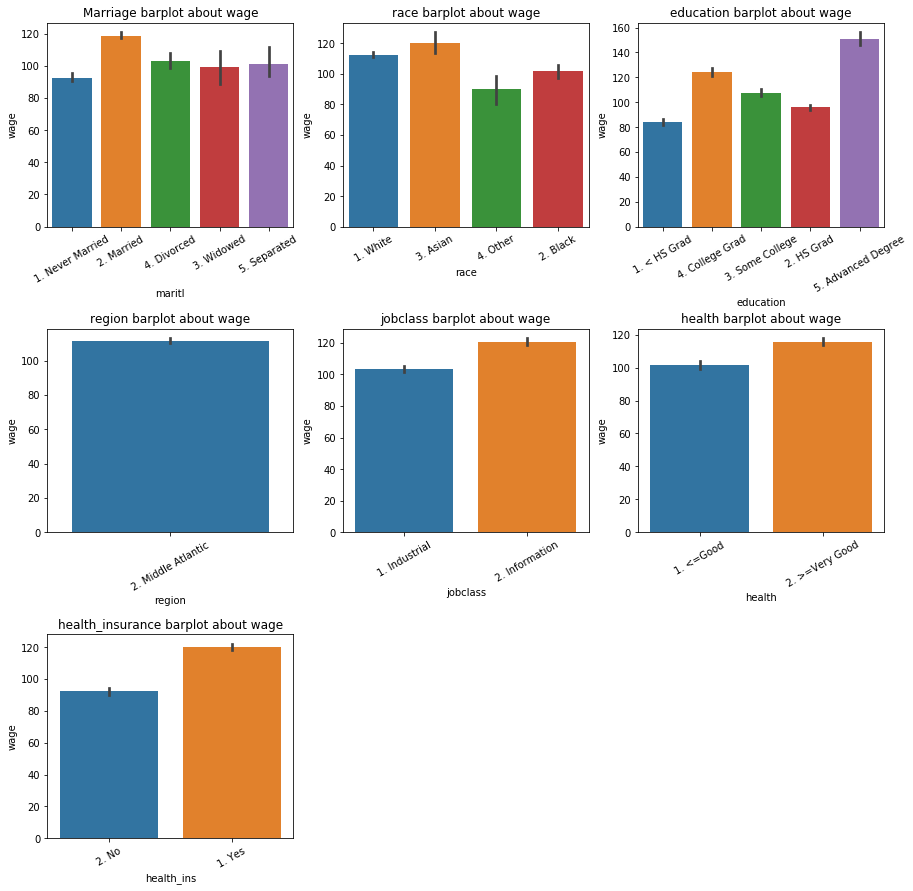

In [73]:
fig = plt.figure(figsize = (15,15))

plt.subplot(331)
sns.barplot(x = "maritl", y = "wage", data = wage)
plt.title("Marriage barplot about wage")
plt.xticks(rotation=30)

plt.subplot(332)
sns.barplot(x = "race", y = "wage", data = wage)
plt.title("race barplot about wage")
plt.xticks(rotation=30)

plt.subplot(333)
sns.barplot(x = "education", y = "wage", data = wage)
plt.title("education barplot about wage")
plt.xticks(rotation=30)

plt.subplot(334)
sns.barplot(x = "region", y = "wage", data = wage)
plt.title("region barplot about wage")
plt.xticks(rotation=30)

plt.subplot(335)
sns.barplot(x = "jobclass", y = "wage", data = wage)
plt.title("jobclass barplot about wage")
plt.xticks(rotation=30)

plt.subplot(336)
sns.barplot(x = "health", y = "wage", data = wage)
plt.title("health barplot about wage")
plt.xticks(rotation=30)

plt.subplot(337)
sns.barplot(x = "health_ins", y = "wage", data = wage)
plt.title("health_insurance barplot about wage")
plt.xticks(rotation=30)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

In [48]:
# region check
wage.region.unique()

array(['2. Middle Atlantic'], dtype=object)

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LogWage Histogram')

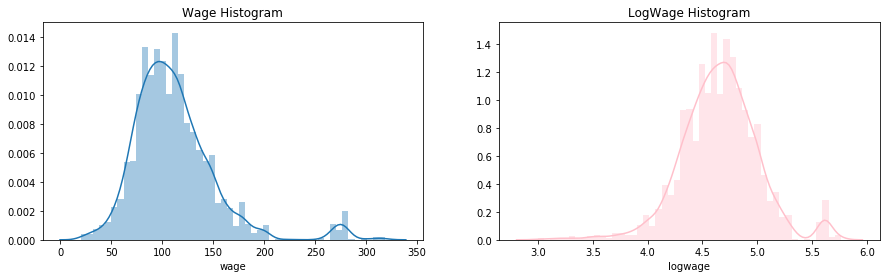

In [75]:
fig = plt.figure(figsize = (15, 4))

plt.subplot(121)
sns.distplot(wage["wage"])
plt.title("Wage Histogram")
plt.subplot(122)
sns.distplot(wage["logwage"], color = "pink")
plt.title("LogWage Histogram")

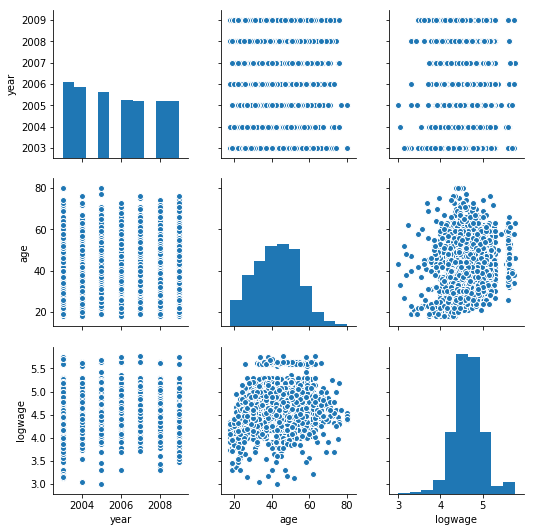

In [94]:
sns.pairplot(wage.drop("wage", axis = 1), size = 2.5)

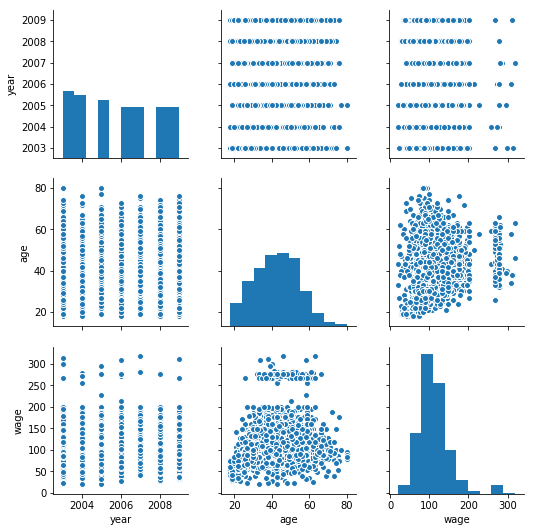

In [91]:
sns.pairplot(wage[["year", "age", "wage"]], size = 2.5)

In [37]:
wage[["year", "age", "wage"]].head()

,year,age,wage
0,2006,18,75.043154
1,2004,24,70.476020
2,2003,45,130.982177
3,2003,43,154.685293
4,2005,50,75.043154


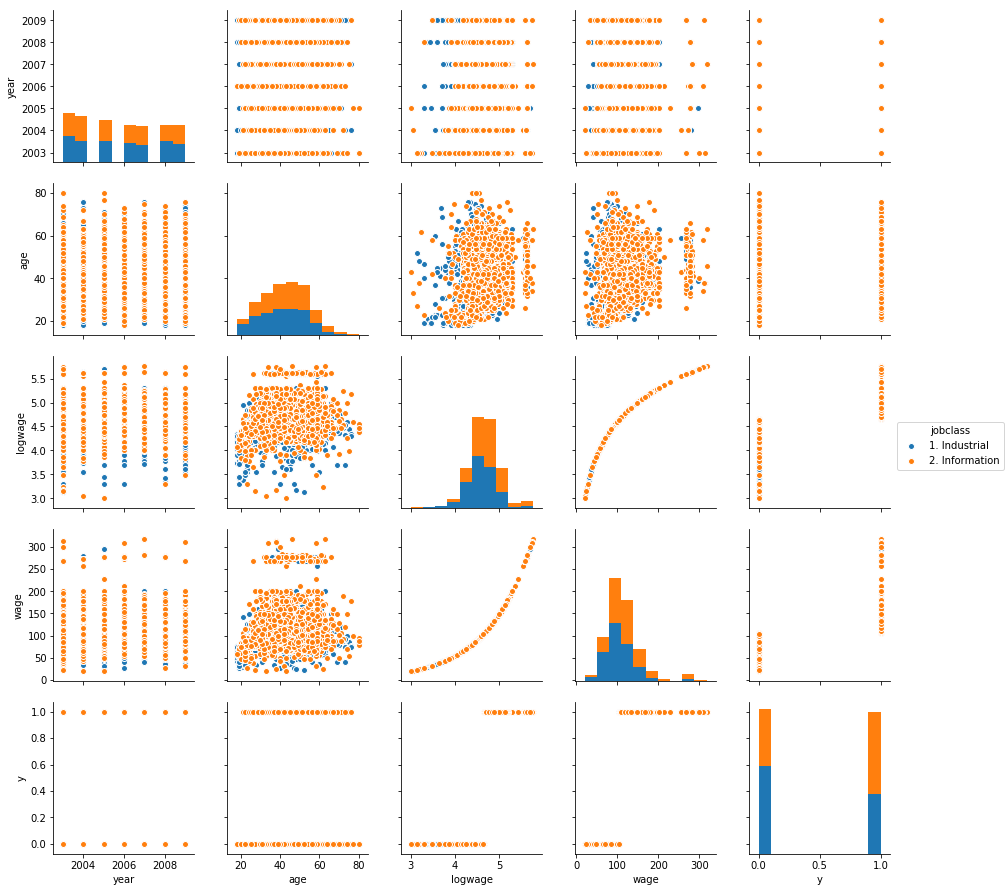

In [112]:
sns.pairplot(wage, hue = "jobclass", size = 2.5)

In [97]:
# check for jobclass
wage.jobclass.unique()

array(['1. Industrial', '2. Information'], dtype=object)

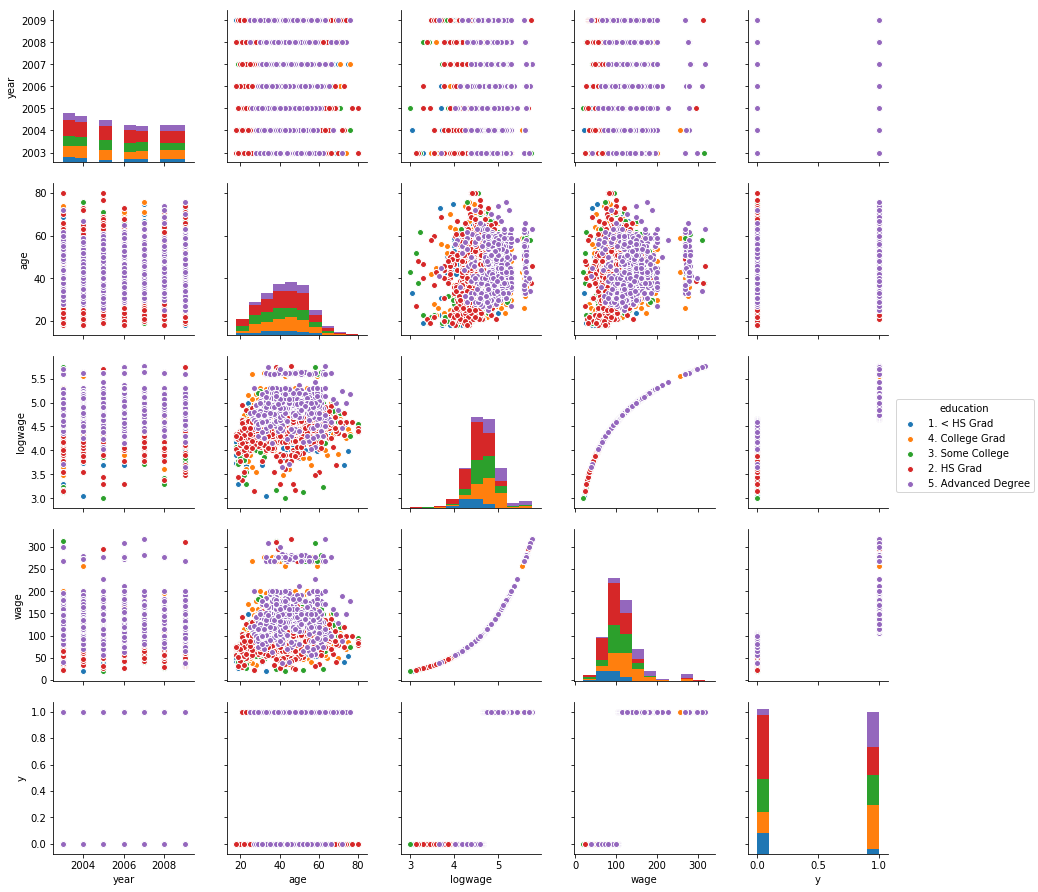

In [111]:
sns.pairplot(wage, hue = "education", size = 2.5)

In [106]:
med_wage = wage.logwage.median() # median
med_wage

4.6532125137753395

In [108]:
wage["y"] = np.where(wage.logwage>med_wage, 1, 0)

In [113]:
wage["y"] = wage["y"].astype("category")

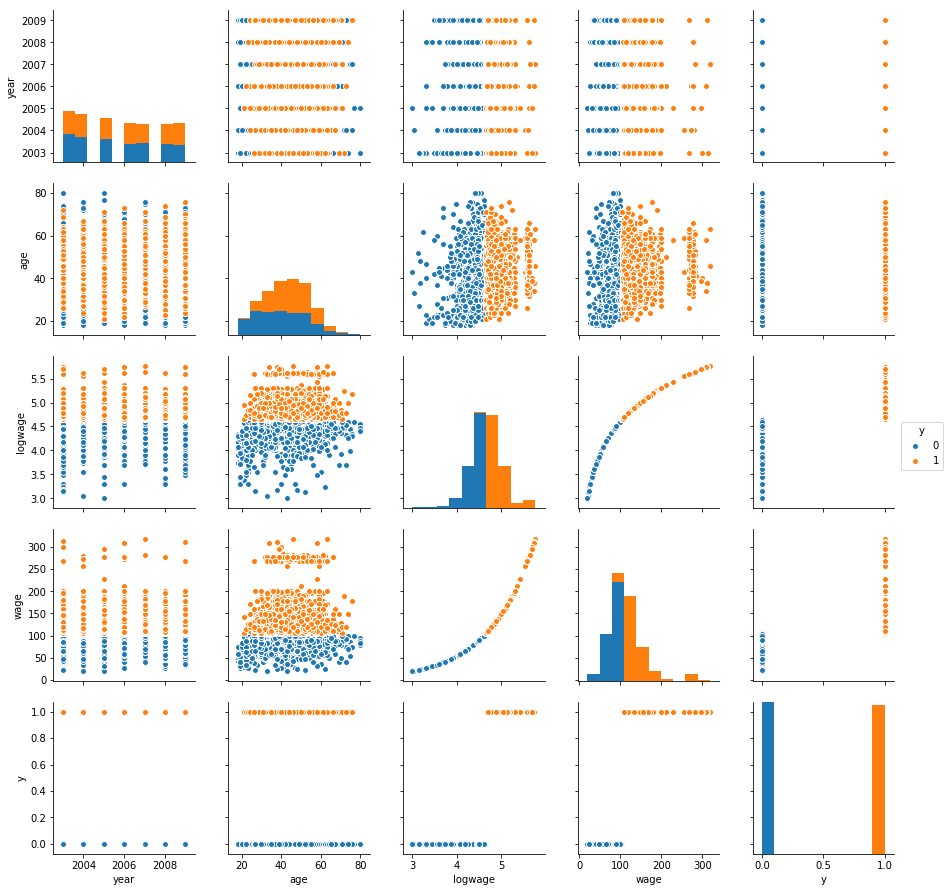

In [114]:
sns.pairplot(wage, hue = "y", size =2.5)

In [115]:
pd.crosstab(wage["maritl"], wage["health"], margins = True)
# The less healthy you are, the more likely to widow, divorce and separate

health,1. <=Good,2. >=Very Good,All
maritl,,,
1. Never Married,186,462,648
2. Married,568,1506,2074
3. Widowed,7,12,19
4. Divorced,79,125,204
5. Separated,18,37,55
All,858,2142,3000


In [116]:
pd.crosstab(wage["education"], wage["jobclass"], margins = True)
# The more you learn in school or college(university), the more you have job in information area

jobclass,1. Industrial,2. Information,All
education,,,
1. < HS Grad,190,78,268
2. HS Grad,636,335,971
3. Some College,342,308,650
4. College Grad,274,411,685
5. Advanced Degree,102,324,426
All,1544,1456,3000


## 통계 검정

In [117]:
known_logwage_mean = 4.7

In [120]:
X_l_bar = wage["logwage"].mean()
X_l_bar

4.653905072211974

In [122]:
X_l_std = wage.logwage.std()
X_l_std

0.3517525900390048

In [124]:
n_l = len(wage.logwage)
n_l

3000

In [138]:
Z_l0 = (X_l_bar - known_logwage_mean)/(X_l_std/np.sqrt(n_l))
Z_l0

-7.1775538975488375

In [139]:
from scipy.stats import norm

In [140]:
p_Z_l = norm.cdf(Z_l0)
p_Z_l

3.548484206980169e-13

In [141]:
p_Z_l < 0.025 # 유의수준 0.05 수준에서 기각 가능하다

True

In [147]:
known_wage_mean = np.exp(4.7)
known_wage_mean

109.94717245212352

In [143]:
X_bar = wage.wage.mean()
X_bar

111.70360820174366

In [144]:
X_std = wage.wage.std()
X_std

41.728595492757094

In [145]:
Z0 = (X_bar - known_wage_mean)/(X_std/np.sqrt(n_l))
Z0

2.305468155625867

In [146]:
p_Z = norm.cdf(Z0)
p_Z

0.9894298158862533

In [148]:
1 - p_Z < 0.025 # 0.05 수준에서 기각 가능하다

True

In [158]:
wage.jobclass.unique()

array(['1. Industrial', '2. Information'], dtype=object)

In [153]:
logwage_by_job = pd.pivot_table(wage, values = "logwage", index = "jobclass", 
                                aggfunc = [len, np.mean, np.median, np.std])
logwage_by_job # 잘 만들긴 했지만 이렇게 안 쓰는 게 좋겠다

,len,mean,median,std
,logwage,logwage,logwage,logwage
jobclass,,,,
1. Industrial,1544.0,4.583753,4.602060,0.332163
2. Information,1456.0,4.728297,4.724276,0.356739


In [160]:
ind = wage.loc[wage.jobclass == "1. Industrial"]
ind.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,y
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,0
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,1
6,2009,44,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538,1
11,2007,34,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.397940,81.283253,0
13,2003,39,2. Married,1. White,4. College Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.903090,134.705375,1


In [161]:
inf = wage.loc[wage.jobclass == '2. Information']
inf.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,y
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,0
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,1
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,0
5,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744,1
7,2008,30,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849,1


In [163]:
# H0 : industrial과 information 직업 사이의 logwage 모평균 값이 같다
# H1 : industrial과 information 직업 사이의 logwage 모평균 값이 같지 않다
# 등분산 가정은 만족한다고 할 수 있다. 
# 검정통계량 ((x1_bar - x2_bar) - (Mu1 - Mu2)) / (s_pool / sqrt(n))
from scipy import stats
stats.ttest_ind(ind["logwage"], inf["logwage"], equal_var = True) # p_value 매우매우 낮음. 기각 가능 [== 직업군에 따른 임금 차이 있다]

Ttest_indResult(statistic=-11.467948900027167, pvalue=8.116782424584734e-30)

In [167]:
pd.pivot_table(wage, values = "logwage", index = "health", 
              aggfunc = [len, np.mean, np.median, np.std])

,len,mean,median,std
,logwage,logwage,logwage,logwage
health,,,,
1. <=Good,858.0,4.565951,4.591065,0.339023
2. >=Very Good,2142.0,4.689136,4.698970,0.350664


In [164]:
wage.health.unique()

array(['1. <=Good', '2. >=Very Good'], dtype=object)

In [165]:
good = wage.loc[wage.health == wage.health.unique()[0]]
good.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,y
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,0
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,1
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,0
7,2008,30,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849,1
10,2007,45,4. Divorced,1. White,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.763428,117.146817,1


In [166]:
v_good = wage.loc[wage.health == wage.health.unique()[1]]
v_good.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,y
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,0
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,1
5,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744,1
6,2009,44,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538,1
8,2006,41,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359,1


In [169]:
stats.ttest_ind(good["logwage"], v_good["logwage"], equal_var = True) # p_value 매우 낮다. 기각 가능하다 [== 건강에 따른 임금 차이 있다]

Ttest_indResult(statistic=-8.777108750530935, pvalue=2.7631709797052894e-18)

In [170]:
wage.health_ins.unique()

array(['2. No', '1. Yes'], dtype=object)

In [171]:
pd.pivot_table(wage, values = "logwage", index = "health_ins", 
              aggfunc = [len, np.mean, np.median, np.std])

,len,mean,median,std
,logwage,logwage,logwage,logwage
health_ins,,,,
1. Yes,2083.0,4.740182,4.724276,0.306429
2. No,917.0,4.457925,4.477121,0.369178


In [172]:
ins_y = wage.loc[wage.health_ins == "1. Yes"]
ins_y.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,y
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,1
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,1
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,0
5,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744,1
6,2009,44,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538,1


In [173]:
ins_n = wage.loc[wage.health_ins == "2. No"]
ins_n.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,y
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,0
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,0
11,2007,34,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.397940,81.283253,0
16,2003,37,1. Never Married,3. Asian,4. College Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.414973,82.679637,0
17,2006,50,2. Married,1. White,5. Advanced Degree,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,5.360552,212.842352,1


In [174]:
stats.ttest_ind(ins_y["logwage"], ins_n["logwage"], equal_var = False) # 기각 가능하다[== 보험 유무에 따른 임금 차이 있다]

Ttest_indResult(statistic=20.280202539345265, pvalue=5.595892099633275e-81)